In [1]:
# En el encabezado del script agregamos la ruta donde se encuentra el
# archivo map_plots.py que contienen las funciones para generar las figuras

import sys
sys.path.append('./..')
from map_plots import map_pcolor

# Para este ejemplo usamos la biblioteca xarray, que permite leer
# datos de archivos netcdf, y reconoce detalles como variables 
# de coordenadas para realizar analisis con un nivel de abstracción
# mas alto.
# Si los datos son netCDF + CF compliant, xarray detecta variables
# de coordenadas y atributos especiales.
# http://xarray.pydata.org/en/stable/

import xarray as xr 

In [2]:
# Cargar Datos usando xarray
ncSrc = '../../gom-cicese-roms-fennel-bio-5km/data/gom-cicese-roms-fennel-bio-5km-seasClim-chl-int-cf.nc'

dst = xr.open_dataset(ncSrc)
dstLon = dst.variables['lon_rho'].values
dstLat = dst.variables['lat_rho'].values

dst['chlorophyll']

<xarray.DataArray 'chlorophyll' (time: 4, lat: 327, lon: 375)>
[490500 values with dtype=float64]
Coordinates:
    lon_rho  (lat, lon) float64 -97.7 -97.65 -97.6 -97.55 ... -79.1 -79.05 -79.0
    lat_rho  (lat, lon) float64 15.6 15.6 15.6 15.6 ... 30.54 30.54 30.54 30.54
Dimensions without coordinates: time, lat, lon
Attributes:
    long_name:      time-averaged chlorophyll concentration
    units:          mg/m3
    time:           ocean_time
    field:          chlorophyll, scalar, series
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water

Text(0.02, 0.94, 'Invierno')

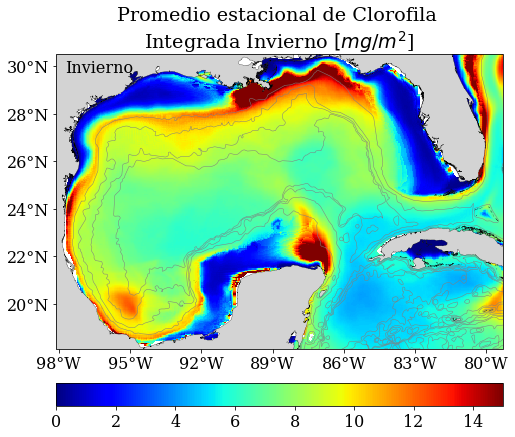

In [6]:
# Graficado escala linear
ax, figure = map_pcolor(dstLon, dstLat, dst['chlorophyll'][0,:],
                        title='Promedio estacional de Clorofila \nIntegrada Invierno $[mg/m^{2}$]',
                        tickBins={ 'x' : [-98,-95,-92,-89,-86,-83,-80], 
                                   'y' : [20,22,24,26,28,30] },                        
                        extent=[-98.1, -79.3, 18.1, 30.5],
                        vmin=0, vmax=15,
                        cmap='jet')

# Si es necesario agregar leyendas
ax.annotate('Invierno', xy=(0.02, 0.94), xycoords='axes fraction')

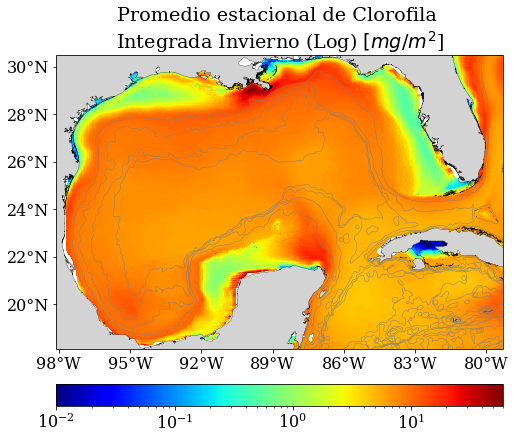

In [5]:
# Graficado escala color logaritmica
# Ver: https://matplotlib.org/3.3.2/tutorials/colors/colormapnorms.html#logarithmic

import matplotlib.colors as colors

chl_invierno = dst['chlorophyll'][0,:]

ax, figure = map_pcolor(dstLon, dstLat, chl_invierno,
                        title='Promedio estacional de Clorofila \nIntegrada Invierno (Log) $[mg/m^{2}$]',
                        tickBins={ 'x' : [-98,-95,-92,-89,-86,-83,-80], 
                                   'y' : [20,22,24,26,28,30] },                            
                        extent=[-98.1, -79.3, 18.1, 30.5],
                        norm=colors.LogNorm(vmin=0.01, vmax=chl_invierno.max()),
                        cmap='jet')

